# Bài tập

- Nguyễn Thị Kiều Trang
- 22642451
  

In [2]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [5]:
# a
X = binom(10, 0.25)
print('Số câu đúng của bạn sinh viên trong 10 lần kiểm tra:', X.rvs(10))
# rvs: tạo mẫu ngẫu nhiên từ phân phối. 

Số câu đúng của bạn sinh viên trong 10 lần kiểm tra: [5 1 2 4 1 3 3 2 0 2]


In [8]:
#b
# x = số câu đúng -> 4x - 2 * (10 - x) = 4 <=> 6x = 24 <=> x = 4
print('Xác suất sinh viên được 4 điểm là', X.pmf(4))

Xác suất sinh viên được 4 điểm là 0.14599800109863278


In [9]:
# c
print('E(X):', X.mean())
print('Var(X):', X.var())

E(X): 2.5
Var(X): 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [10]:
lamda = 3
X = poisson(lamda)

print('Xác suất để trung tâm nhận được 1, 2, 3 cuộc gọi trong 1 phút là', X.cdf(3))

Xác suất để trung tâm nhận được 1, 2, 3 cuộc gọi trong 1 phút là 0.6472318887822313


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.
b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

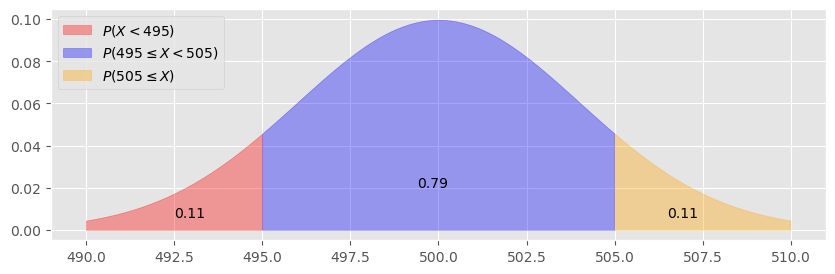

In [11]:
# a
muy = 500
std = 4
X = norm(loc=muy, scale=std)

x = [495, 505]
y = X.cdf(x)

plt.figure(figsize=(10, 3))
plt.fill_between(x=np.arange(490, 495, 0.01), 
                 y1= X.pdf(np.arange(490, 495, 0.01)),
                 color='red',
                 alpha=0.35,
                 label='$P(X < 495)$')

plt.fill_between(x=np.arange(495, 505, 0.01), 
                 y1= X.pdf(np.arange(495, 505, 0.01)),
                 color='blue',
                 alpha=0.35,
                 label='$P(495 \leq X < 505)$')

plt.fill_between(x=np.arange(505, 510, 0.01), 
                 y1= X.pdf(np.arange(505, 510, 0.01)),
                 color='orange',
                 alpha=0.35,
                 label='$P(505 \leq X)$')

plt.text(x=492.5, y=0.006, s=round(y[0], 2))
plt.text(x=499.4, y=0.02, s=round(y[1] - y[0], 2))
plt.text(x=506.5, y=0.006, s=round(1 - y[1], 2))

plt.legend(loc='upper left')
plt.show()

Trung bình E(sam_20): 500.01993323231255
Độ lệch chuẩn Std(sam_20): 4.9089982505926475


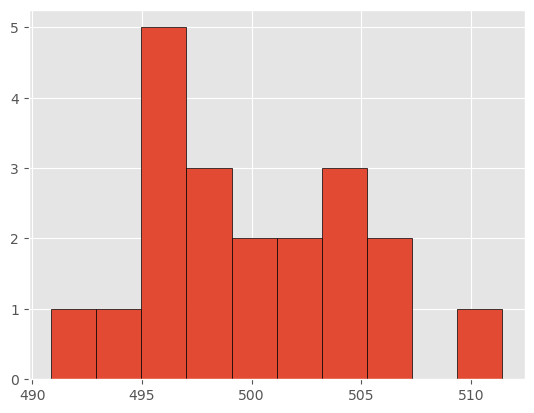

In [14]:
# b. mô phỏng lấy mẫu 20 trái cây trên, vẽ histogram, tính giá trị trung bình và độ lệch chuẩn
sam_20 = X.rvs(20)
print('Trung bình E(sam_20):', sam_20.mean())
print('Độ lệch chuẩn Std(sam_20):', sam_20.std())

plt.hist(sam_20, edgecolor="black")
plt.show()

Trung bình E(sam_100): 500.5893663130027
Độ lệch chuẩn Std(sam_100): 3.6884205591154293


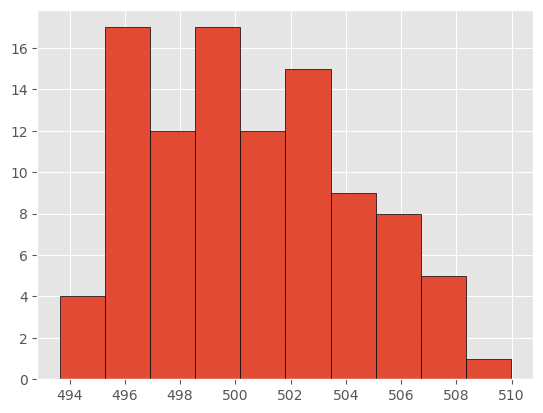

In [17]:

# c. mô phỏng lấy 100 trái cây
sam_100 = X.rvs(100)
print('Trung bình E(sam_100):', sam_100.mean())
print('Độ lệch chuẩn Std(sam_100):', sam_100.std())

plt.hist(sam_100, edgecolor = 'black')
plt.show()

d,nhận xét 2 cách lấy mẫu
- khi số lượng mẫu tăng, histogram có xu hướng tiệm cận với hình dạng phân phối chuẩn thực tế

**Bài 4:** Cho X là phân phối chuẩn tắc.
- Tìm P(X<0.5); P(X>0.5); P(|X|<0.5)
- Tìm z thỏa mãn: P(X<z)=1.96; P(X>z)=1.96; P(|X|<z)=1.96

In [5]:
# X ~ N(0,1)
from math import isclose
from scipy.stats import norm

#1.96 không thể tính => sửa đề thành 0.95


# 1) Xác suất tại 0.5
p_lt_05 = norm.cdf(0.5)
p_gt_05 = norm.sf(0.5)       
p_abs_lt_05 = 2*norm.cdf(0.5) - 1

print("P(X<0.5)    =", p_lt_05)
print("P(X>0.5)    =", p_gt_05)
print("P(|X|<0.5)  =", p_abs_lt_05)

# 2) Tìm z cho các mức P(...) = 0.96
p = 0.95
z_lt_p = norm.ppf(p)            
z_gt_p = norm.ppf(1 - p)        
z_abs_p = norm.ppf((p + 1) / 2)  

print("\nVới p = 0.95:")
print("z sao cho P(X<z)=0.95  ->", z_lt_p)
print("z sao cho P(X>z)=0.95  ->", z_gt_p)
print("z sao cho P(|X|<z)=0.95->", z_abs_p)

# Tham chiếu quen thuộc: P(|X|<1.96) ≈ 0.95, P(X<1.96) ≈ 0.975 => không tính được 1.96 => sửa thành 0.95
z_two_sided_95 = norm.ppf(0.975)
print("\nMốc quen thuộc: z cho P(|X|<z)=0.95 ->", z_two_sided_95)


P(X<0.5)    = 0.6914624612740131
P(X>0.5)    = 0.3085375387259869
P(|X|<0.5)  = 0.38292492254802624

Với p = 0.95:
z sao cho P(X<z)=0.95  -> 1.644853626951472
z sao cho P(X>z)=0.95  -> -1.644853626951472
z sao cho P(|X|<z)=0.95-> 1.959963984540054

Mốc quen thuộc: z cho P(|X|<z)=0.95 -> 1.959963984540054


**Bài 5:** Cho X là phân phối chuẩn với trung bình là 10, độ lệch chuẩn là 2
- Tìm P(X<12); P(|X|<12)
- Tìm z thỏa mãn: P(X<z)=2.58; P(X>z)=2.58; P(|X|<z)=2.58
- Tìm giá trị t mà 25% giá trị của X không vượt quá t.
- Tìm giá trị t mà 5% giá trị của X lớn hơn t.

In [8]:
# X ~ N(mu=10, sigma=2)
from math import isfinite

mu, sigma = 10.0, 2.0
dist = norm(loc=mu, scale=sigma)

# 1) Xác suất
# P(X<12)
p_lt_12 = dist.cdf(12) 
# P(|X|<12) = P(-12 < X < 12)
p_abs_lt_12 = dist.cdf(12) - dist.cdf(-12)     

print("P(X<12)      =", p_lt_12)
print("P(|X|<12)    =", p_abs_lt_12)

# 2)

# 2A) Hiểu 2.58 là mốc z≈2.5758 tương ứng p≈0.995
p = 0.995
# P(X<z)=0.995
z_a = dist.ppf(p)
# P(X>z)=0.995
z_b = dist.ppf(1 - p)             

print("\nGiải thích A (p=0.995 ~ z=2.58 chuẩn hoá):")
print("z s.t. P(X<z)=0.995 :", z_a)
print("z s.t. P(X>z)=0.995 :", z_b)
print("z s.t. P(|X|<z)≈0.995:", z_a)

# 2B) Hiểu 2.58 là z theo chuẩn hoá: x = mu + 2.58*sigma
zstd = 2.58
x_from_zstd = mu + zstd * sigma
print("\nGiải thích B (zstd=2.58 => x = mu + 2.58*sigma):")
print("x = ", x_from_zstd)
print("P(X<x) =", dist.cdf(x_from_zstd))
print("P(X>x) =", dist.sf(x_from_zstd))
print("P(|X-mu|<2.58*sigma) =", norm.cdf(zstd) - norm.cdf(-zstd)) 

# 3) Bách phân vị
t_25 = dist.ppf(0.25)             
t_95 = dist.ppf(0.95)             
print("\nBách phân vị:")
print("t sao cho 25% ≤ t :", t_25)
print("t sao cho 5%  > t :", t_95)


P(X<12)      = 0.8413447460685429
P(|X|<12)    = 0.8413447460685429

Giải thích A (p=0.995 ~ z=2.58 chuẩn hoá):
z s.t. P(X<z)=0.995 : 15.1516586070978
z s.t. P(X>z)=0.995 : 4.848341392902199
z s.t. P(|X|<z)≈0.995: 15.1516586070978

Giải thích B (zstd=2.58 => x = mu + 2.58*sigma):
x =  15.16
P(X<x) = 0.9950599842422294
P(X>x) = 0.004940015757770644
P(|X-mu|<2.58*sigma) = 0.9901199684844588

Bách phân vị:
t sao cho 25% ≤ t : 8.651020499607837
t sao cho 5%  > t : 13.289707253902943


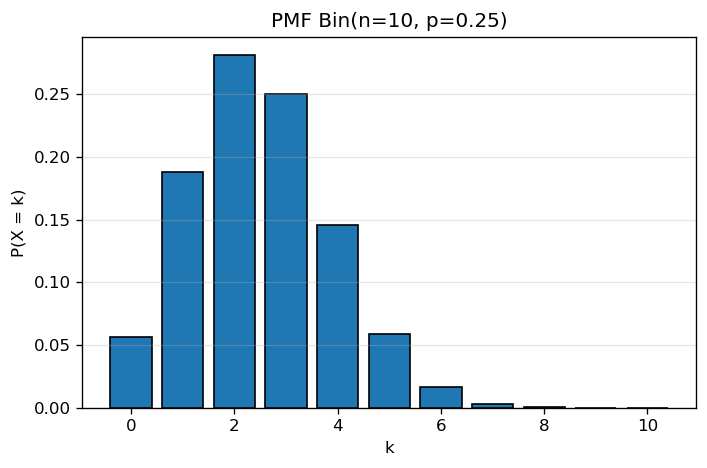

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 10, 0.25
k = np.arange(0, n+1)
pmf = binom.pmf(k, n, p)

plt.figure(figsize=(6,4), dpi=120)
# Cách 1: bar
plt.bar(k, pmf, width=0.8, edgecolor='black')
# Cách 2 (thay thế): stem (cột có “que”)
# markerline, stemlines, baseline = plt.stem(k, pmf, use_line_collection=True)

plt.title(f'PMF Bin(n={n}, p={p})')
plt.xlabel('k')
plt.ylabel('P(X = k)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


.

------

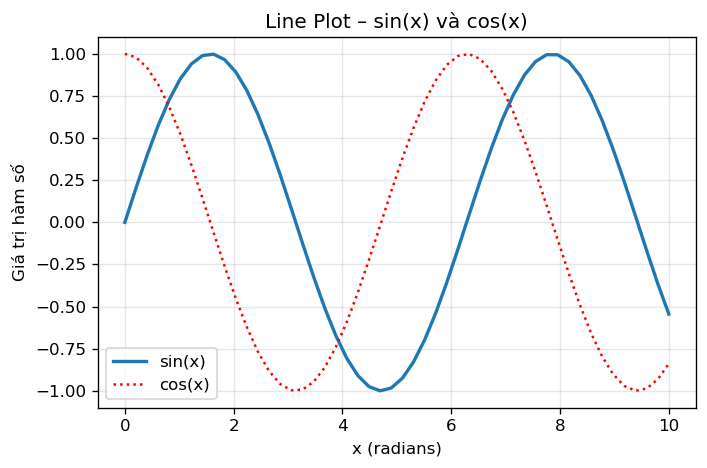

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.linspace(0,10,50) 
y = np.sin(x)
z = np.cos(x) 

plt.figure(figsize=(6,4), dpi=120)      # tạo vùng vẽ (figure) 6x4 inch, nét 120dpi

# vẽ 2 đường: sin(x) và cos(x)
plt.plot(x, y, label='sin(x)', linewidth=2)     # đường 1, nhãn 'sin(x)'
plt.plot(x, z, label='cos(x)', linestyle=':',color='red')  # đường 2, kiểu nét đứt '--'

plt.title('Line Plot – sin(x) và cos(x)')       # tiêu đề biểu đồ
plt.xlabel('x (radians)')                       # nhãn trục X
plt.ylabel('Giá trị hàm số')                    # nhãn trục Y
plt.legend()                                    # hiện chú giải (legend)
plt.grid(True, alpha=0.3)                       # thêm lưới nhẹ
plt.tight_layout()                              # căn lề cho đẹp
plt.show()                                      # hiển thị


In [15]:
from scipy.stats import binom

n, p = 10, 0.5   # 10 lần tung đồng xu, xác suất ra ngửa là 0.5

# 1. rvs – sinh 1000 lần thử
samples = binom.rvs(n, p, size=1000)
print('sinh 1000 lần thử:', samples)

# 2. pmf – P(X = 3)
P_3 = binom.pmf(3, n, p)
print('pmf – P(X = 3):',P_3 )

# 3. cdf – P(X ≤ 3)
P_le_3 = binom.cdf(3, n, p)
print('cdf – P(X ≤ 3):',P_le_3 )

# 4. ppf – giá trị k sao cho P(X ≤ k) = 0.95
k_95 = binom.ppf(0.95, n, p)
print('ppf – giá trị k sao cho P(X ≤ k) = 0.95:',k_95 )


sinh 1000 lần thử: [ 6  7  5  3  5  3  5  2  6  5  2  5  4  5  5  5  7  6  6  7  6  7  7  5
  6  3  7  7  5  6  4  3  5  8  2  4  3  5  7  3  6  6  3  6  5  6  6  5
  4  5  5  6  5  6  4  4  4  6  5  7  4  4  4  4  5  3  5  4  5  4 10  4
  2  5  6  3  7  6  5  7  5  7  4  5  3  8  4  5  5  4  5  3  7  5  7  3
  9  6  4  6  6  2  6  4  6  6  4  6  5  5  8  5  4  9  3  5  5  2  6  4
  3  4  8  8  2  5  4  4  3  4  2  6  5  4  7  6  6  2  5  5  4  7  5  4
  5  3  6  5  3  6  6  3  4  7  5  5  5  8  6  6  5  6  5  4  5  5  3  4
  8  7  6  5  4  7  6  5  6  5  4  1  4  4  6  6  4  3  9  7  3  6  6  7
  5  2  4  6  3  7  7  3  3  6  2  4  5  7  3  4  7  5  5  4  5  6  6  6
  5  6  7  3  6  6  2  4  4  6  4  3  5  4  4  3  1  7  5  7  8  5  5  6
  6  7  4  6  3  4  4  3  6  4  5  4  5  7  5  5  3  5  4  4  4  5  1  6
  6  5  5  5  7  5  5  4  6  4  6  6  4  5  4  6  5  5  3  5  6  2  7  6
  7  4  4  4  7  6  4  6  5  7  3  6  3  6  6  7  6  5  5  4  5  4  8  4
  4  3  6  3  8  5  7  6  5  3  

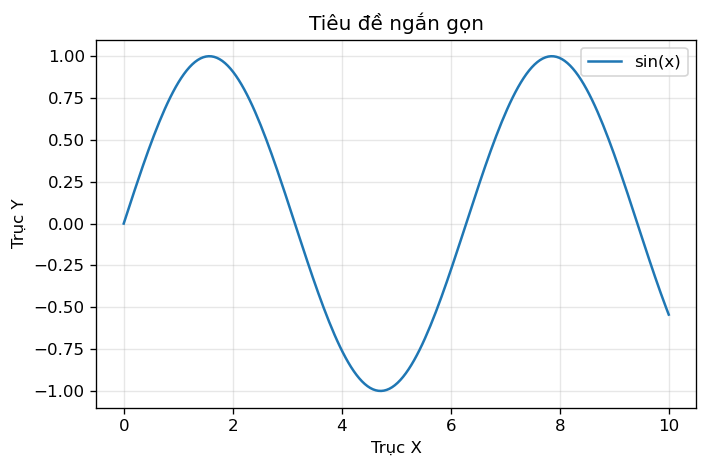

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1) CHUẨN BỊ DỮ LIỆU
x = np.linspace(0, 10, 200)
y = np.sin(x)

# 2) TẠO HÌNH
plt.figure(figsize=(6, 4), dpi=120)

# 3) VẼ
plt.plot(x, y, label='sin(x)')  # line chart; thay bằng scatter/bar/hist…

# 4) NHÃN - CHÚ THÍCH
plt.title('Tiêu đề ngắn gọn')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')
plt.legend()

# 5) LƯỚI + LỀ
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 6) HIỂN THỊ / LƯU
# plt.savefig('hinh.png', bbox_inches='tight')
plt.show()


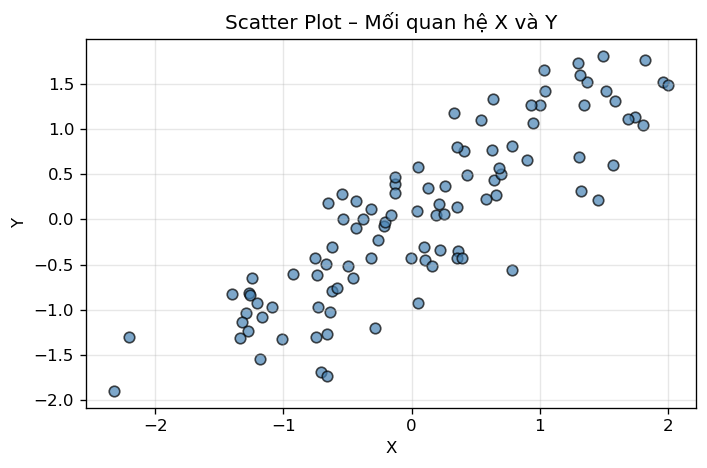

In [23]:
# tạo dữ liệu mô phỏng
rng = np.random.default_rng(0)             # bộ sinh số ngẫu nhiên
x = rng.normal(0, 1, 100)                  # 100 điểm X ~ N(0,1)
y = 0.8*x + rng.normal(0, 0.5, 100)        # Y = 0.8X + nhiễu

plt.figure(figsize=(6,4), dpi=120)
plt.scatter(x, y, color='steelblue', s=40, alpha=0.7, edgecolors='black')
# s=40: kích thước điểm; alpha=0.7: trong suốt nhẹ; edgecolors: viền đen

plt.title('Scatter Plot – Mối quan hệ X và Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


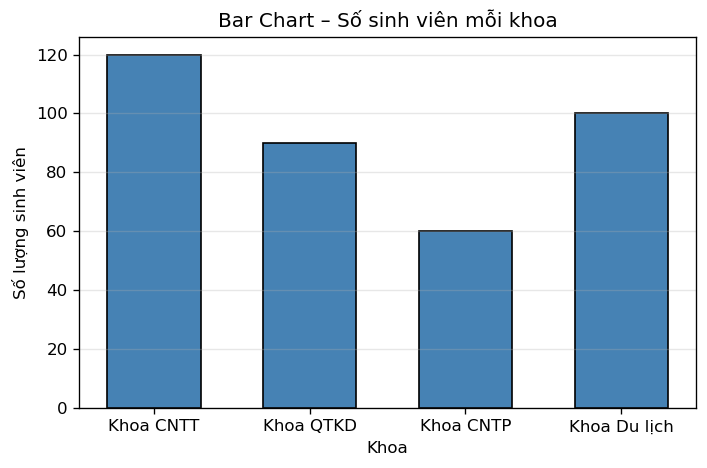

In [31]:
# dữ liệu danh mục
labels = ['Khoa CNTT', 'Khoa QTKD', 'Khoa CNTP', 'Khoa Du lịch']
values = [120, 90, 60, 100]

plt.figure(figsize=(6,4), dpi=120)
plt.bar(labels, values, color='steelblue', edgecolor='black', width=0.6)

plt.title('Bar Chart – Số sinh viên mỗi khoa')
plt.xlabel('Khoa')
plt.ylabel('Số lượng sinh viên')
plt.grid(True, axis='y', alpha=0.3)       # lưới theo trục Y để dễ so sánh chiều cao cột
plt.tight_layout()
plt.show()


Dùng plt.plot() vẽ hàm 𝑦=𝑒^−𝑥 trên đoạn [0,5].

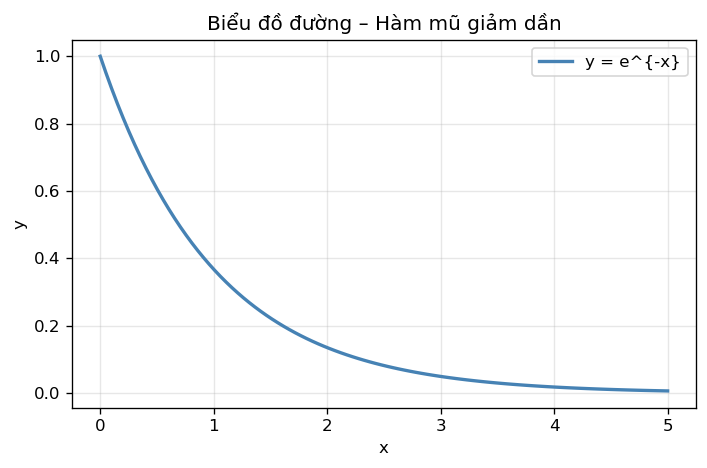

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)     # 100 điểm cách đều 0→5
y = np.exp(-x)                 # e^(-x)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(x, y, color='steelblue', linewidth=2, label='y = e^{-x}')
plt.title('Biểu đồ đường – Hàm mũ giảm dần')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Dùng plt.scatter() vẽ mối quan hệ giữa x = np.linspace(0,10,50) và y = 2x + noise.

# np.random.normal(mean, std, size)
# y=ax+b+ε
𝜀 là nhiễu (noise), tức sai lệch ngẫu nhiên quanh đường lý thuyết.

Nếu ta muốn dữ liệu “bị nhiễu quanh đúng đường thẳng gốc”, thì nhiễu phải có trung bình 0,
để không làm đường cong bị lệch đi hướng nào cả.

3️⃣ Tại sao std = 2?

Độ lệch chuẩn 𝜎 = 2
σ=2 biểu thị mức độ tản mát của nhiễu.
Càng lớn → đám điểm càng loang ra xa đường chuẩn y = 2x.
Càng nhỏ → điểm tập trung sát quanh đường.

Ta chọn 2 vì:
y = 2x tăng khá nhanh (độ dốc lớn),
nếu nhiễu quá nhỏ (vd. 0.1), hình nhìn như đường thẳng hoàn hảo, không thấy “scatter”.
nếu nhiễu quá to (vd. 10), hình thành “đám mây hỗn loạn”, mất quan hệ.
σ = 2 cho hình cân đối: nhìn ra tương quan dương nhưng vẫn thấy nhiễu.

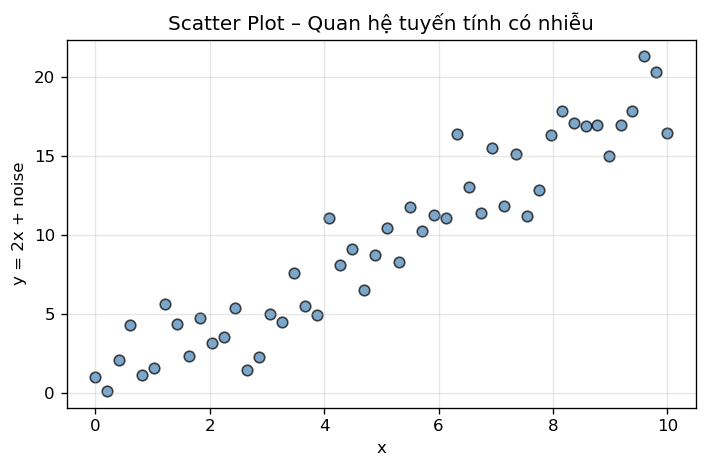

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)                       # cố định seed cho kết quả lặp lại
x = np.linspace(0, 10, 50)               # 50 điểm x
noise = np.random.normal(0, 2, 50)       # nhiễu N(0, 2)
y = 2*x + noise                          # y = 2x + noise

plt.figure(figsize=(6,4), dpi=120)
plt.scatter(x, y, color='steelblue', s=40, alpha=0.7, edgecolors='black')
plt.title('Scatter Plot – Quan hệ tuyến tính có nhiễu')
plt.xlabel('x')
plt.ylabel('y = 2x + noise')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


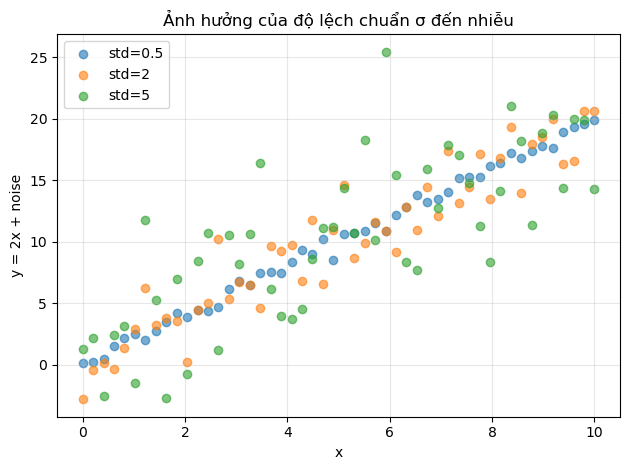

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 50)

# 3 mức nhiễu khác nhau
for std in [0.5, 2, 5]:
    noise = np.random.normal(0, std, 50)
    y = 2*x + noise
    plt.scatter(x, y, alpha=0.6, label=f'std={std}')

plt.title('Ảnh hưởng của độ lệch chuẩn σ đến nhiễu')
plt.xlabel('x'); plt.ylabel('y = 2x + noise')
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


🧱 Bài 3 – Bar Plot: xác suất P(X = k) với X ~ Binom(6, 0.5)

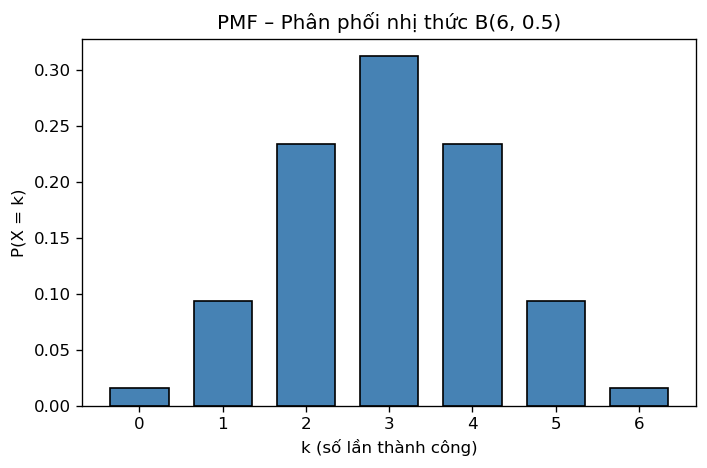

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 6, 0.5                       # số lần thử, xác suất thành công
k = np.arange(0, n+1)               # 0, 1, …, 6
pmf = binom.pmf(k, n, p)            # P(X = k)

plt.figure(figsize=(6,4), dpi=120)
plt.bar(k, pmf, color='steelblue', edgecolor='black', width=0.7)
plt.title('PMF – Phân phối nhị thức B(6, 0.5)')
plt.xlabel('k (số lần thành công)')
plt.ylabel('P(X = k)')
# plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


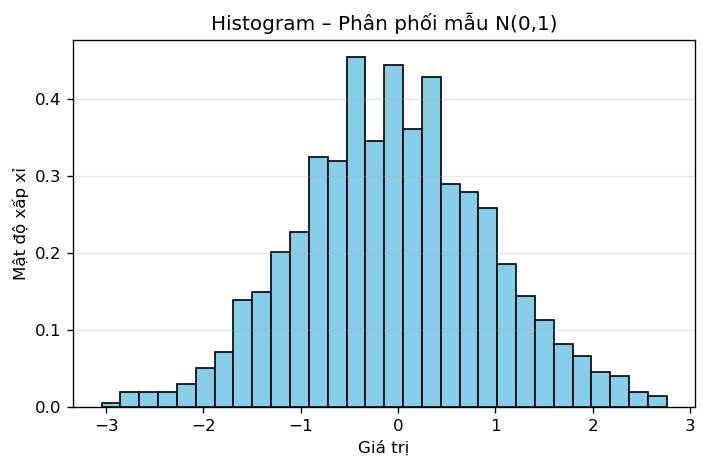

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# sinh dữ liệu giả: 1000 giá trị ~ chuẩn N(0,1)
np.random.seed(0)
data = np.random.normal(0, 1, 1000)

plt.figure(figsize=(6,4), dpi=120)
plt.hist(data, bins=30, density=True, edgecolor='black', color='skyblue')
plt.title('Histogram – Phân phối mẫu N(0,1)')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ xấp xỉ')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


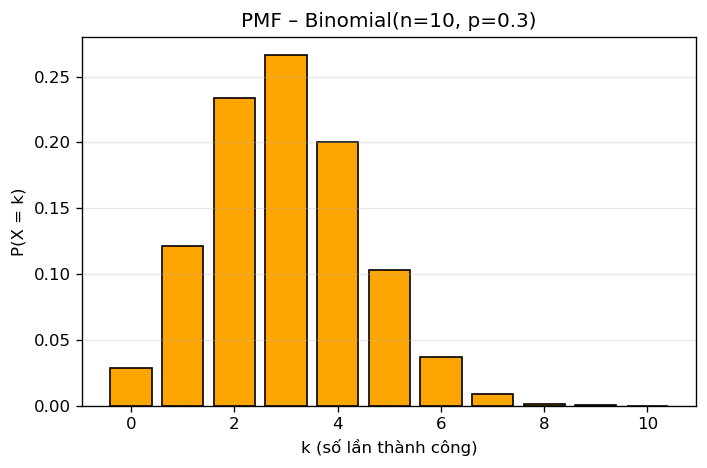

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 10, 0.3
k = np.arange(0, n+1)
pmf = binom.pmf(k, n, p)

plt.figure(figsize=(6,4), dpi=120)
plt.bar(k, pmf, width=0.8, color='orange', edgecolor='black')
plt.title(f'PMF – Binomial(n={n}, p={p})')
plt.xlabel('k (số lần thành công)')
plt.ylabel('P(X = k)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


📚 Giải thích:

binom.pmf(k, n, p) = xác suất đúng k lần thành công.

Dùng bar hoặc stem vì rời rạc.

Tổng tất cả cột = 1.

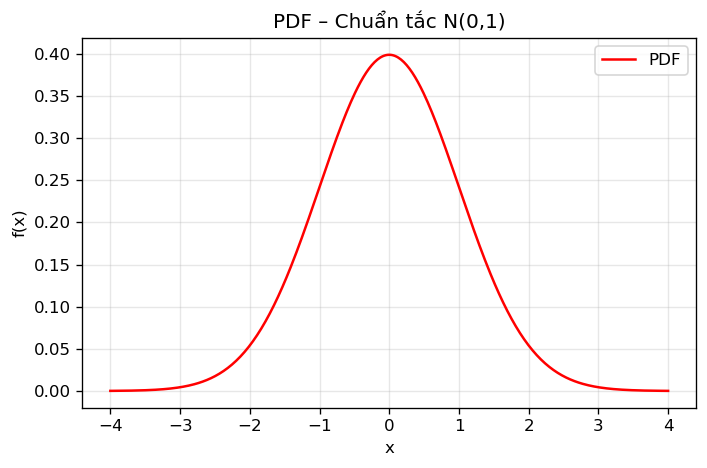

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 0, 1
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(x, pdf, color='red', label='PDF')
plt.title('PDF – Chuẩn tắc N(0,1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


📚 Giải thích:

norm.pdf(x, mu, sigma) trả về giá trị mật độ tại từng x.

Diện tích toàn đường cong = 1.

PDF là “đường cong mượt” mà histogram xấp xỉ.


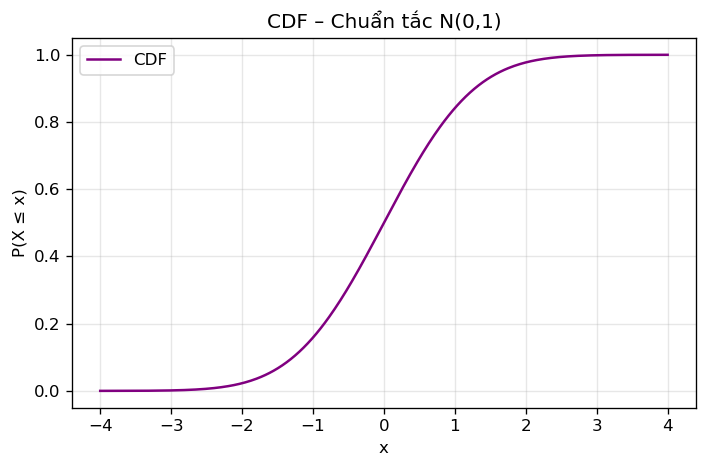

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 0, 1
x = np.linspace(-4, 4, 400)
cdf = norm.cdf(x, mu, sigma)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(x, cdf, color='purple', label='CDF')
plt.title('CDF – Chuẩn tắc N(0,1)')
plt.xlabel('x')
plt.ylabel('P(X ≤ x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


📚 Giải thích:

norm.cdf(x, mu, sigma) tích lũy từ -∞ đến x.

Dạng chữ S.

Dùng khi cần tính xác suất “≤” hoặc “ngưỡng phân vị”.


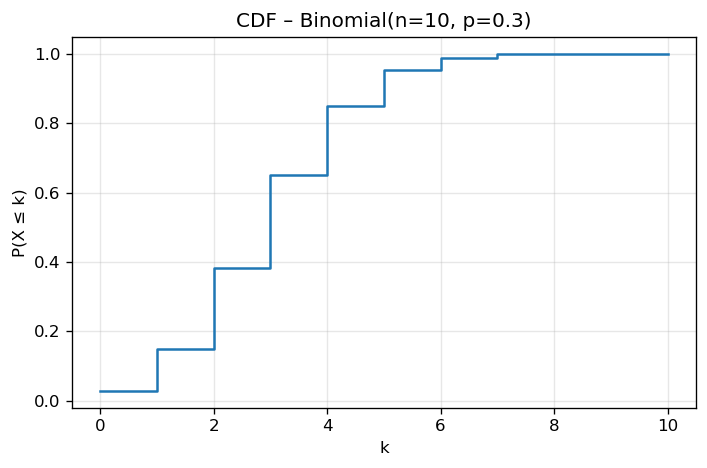

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 10, 0.3
k = np.arange(0, n+1)
cdf = binom.cdf(k, n, p)

plt.figure(figsize=(6,4), dpi=120)
plt.step(k, cdf, where='post')
plt.title(f'CDF – Binomial(n={n}, p={p})')
plt.xlabel('k')
plt.ylabel('P(X ≤ k)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


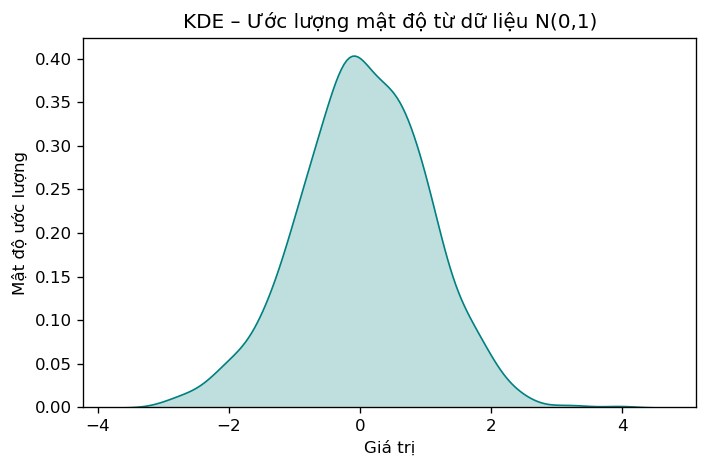

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.normal(0, 1, 1000)

plt.figure(figsize=(6,4), dpi=120)
sns.kdeplot(data=data, fill=True, color='teal')
plt.title('KDE – Ước lượng mật độ từ dữ liệu N(0,1)')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ ước lượng')
plt.tight_layout()
plt.show()


📚 Giải thích:

sns.kdeplot() tự tính ước lượng mật độ.

Giống PDF nhưng không cần biết phân phối thật.

Hữu ích khi bạn có dữ liệu thật và muốn “đoán” dạng phân phối.